# Project for Pacmann Probability Course

## Import Libs

In [105]:
import matplotlib
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import matplotlib.font_manager as font_manager
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
from math import factorial, sqrt
from functuser import *
from numerize.numerize import numerize
import scipy.stats as stats

# customise matplotlib chart
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.titlesize'] = 20 # title
rcParams['axes.labelsize'] = 14 # label
rcParams['figure.titleweight'] = 'bold' #suptitle
rcParams['figure.titlesize'] = 20 
# ticks size must be set manually 

## Import Font & Set Styles for Graphs

In [106]:
# import ROBOTO
load_roboto_var()

# set style
seaborn = 'seaborn-white'
mpl = 'fivethirtyeight'

# color palette
male_cat = '#a2d2ff'
female_cat = '#ffc8dd'
hist_sn = '#bde0fe'
dist_sn = '#e63946' 
bmiL25_cat ='#8ac926'
bmiM25_cat = '#ff595e'
smoker_cat = '#6930c3'
nosmoker_cat = '#72efdd'
density_red = '#e63946'
distribution_blue = '#bde0fe'
# Make every designited BMI color

# dictionary palette
sex_pal = {"female": female_cat, "male": male_cat}
smoker_pal = {"yes": smoker_cat, "no": nosmoker_cat}
region_pal = {
    'northeast': '#4ecdc4',
    'northwest': '#f7fff7', 
    'southeast': '#ff6b6b', 
    'southwest': '#ffe66d'}
bmi_pal = {
    'underweight': '#1982c4',
    'healthy weight': '#8ac926',
    'overweight': '#ffca3a',
    'obesity': '#ff595e'
    }

# Highlight
minMax = 'coolwarm'
corrMatrix = 'RdBu'

## Import Data

In [107]:
data = pd.read_csv('./data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Check Outliers: bmi & charges columns

### bmi outliers

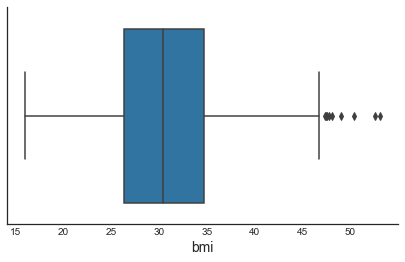

In [108]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 4))

    sns.boxplot(
        ax=ax,
        data=data,
        x='bmi')

    plt.show();

In [109]:
ddf = df_without_outlier(data, 'bmi')
ddf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [110]:
insurance_data = ddf.copy()

insurance_data = get_bmi_status(insurance_data)
insurance_data

,age,sex,bmi,children,smoker,region,charges,bmi_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obesity
2,28,male,33.000,3,no,southeast,4449.46200,obesity
3,33,male,22.705,0,no,northwest,21984.47061,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obesity
1334,18,female,31.920,0,no,northeast,2205.98080,obesity
1335,18,female,36.850,0,no,southeast,1629.83350,obesity
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


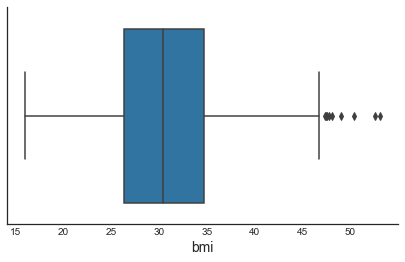

In [111]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 4))

    sns.boxplot(
        ax=ax,
        data=data,
        x='bmi')

    plt.show();

## Descriptive Statistics Analysis

### Customer Segment

In [112]:
# Mean
age_mean = insurance_data['age'].mean()
print_format(age_mean, 2)

39.20


#### Age Distribution

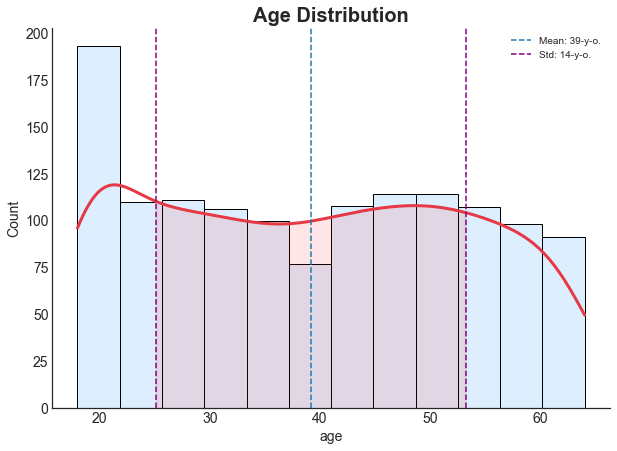

In [113]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    sns.histplot(
        ax=ax, 
        data=insurance_data, 
        x='age', 
        color=distribution_blue, 
        edgecolor='black', 
        kde=True,
        line_kws={'linewidth': 3, 'linestyle':'-'})

    ax.lines[0].set_color(density_red)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    ax.axvline(x=insurance_data['age'].mean(), linestyle='--', label=f'Mean: {insurance_data.age.mean():.0f}-y-o.')
    ax.axvline(
        x=insurance_data['age'].mean()+insurance_data['age'].std(), 
        linestyle='--', 
        label=f'Std: {insurance_data.age.std():.0f}-y-o.',
        color='purple')
    ax.axvline(
        x=insurance_data['age'].mean()-insurance_data['age'].std(), 
        linestyle='--',
        color='purple')

    kde_x, kde_y = ax.lines[0].get_data() # for fill_between

    ax.fill_between(
        kde_x, 
        kde_y, 
        where=(
            kde_x>insurance_data.age.mean() - insurance_data.age.std()) & (kde_x<insurance_data.age.mean() + insurance_data.age.std()
            ), 
        color='red', 
        alpha=0.1)
    ax.set_title("Age Distribution", fontsize=20, fontweight="bold")
    ax.legend()

    plt.show();

#### Customer by Sex

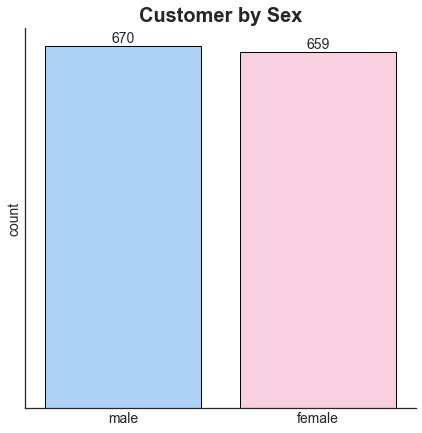

In [114]:
sex_counts = insurance_data['sex'].value_counts().rename_axis('sex').reset_index(name='count')

with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    barset = {'edgecolor':'black', 'linewidth':1}

    sns.barplot(
        ax=ax,
        data=sex_counts,
        x='sex',
        y='count',
        palette=sex_pal,
        **barset)
   
    ax.set_title('Customer by Sex', fontweight='bold')
    ax.set(xlabel=None)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks

    ax.bar_label(ax.containers[0], fontsize=14, fmt='%d')

    plt.show();

#### Sex Distribution by Age

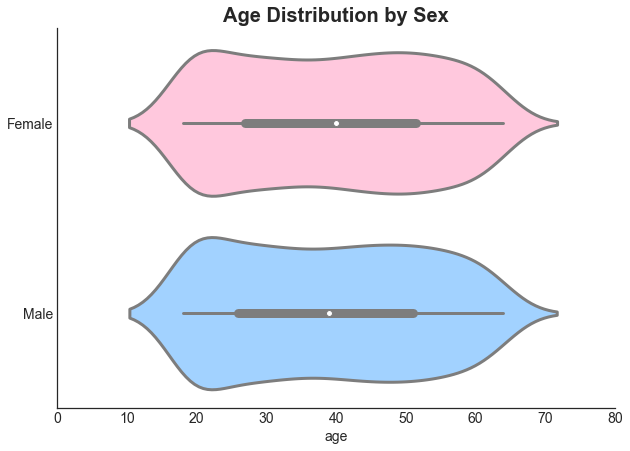

In [115]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(10, 7))

    sns.violinplot(
        ax=ax, 
        x='age', 
        y='sex', 
        data=insurance_data, 
        palette=sex_pal, 
        saturation=1, 
        linewidth=3)
        
    ax.set_title('Age Distribution by Sex', size=20, weight="bold")
    ax.set_yticklabels(['Female', 'Male'])
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    ax.set_xlim(0, 80)
    ax.set(ylabel=None)
    plt.show();

In [116]:
get_male = insurance_data.loc[insurance_data['sex'] == 'male']
get_female = insurance_data.loc[insurance_data['sex'] == 'female']

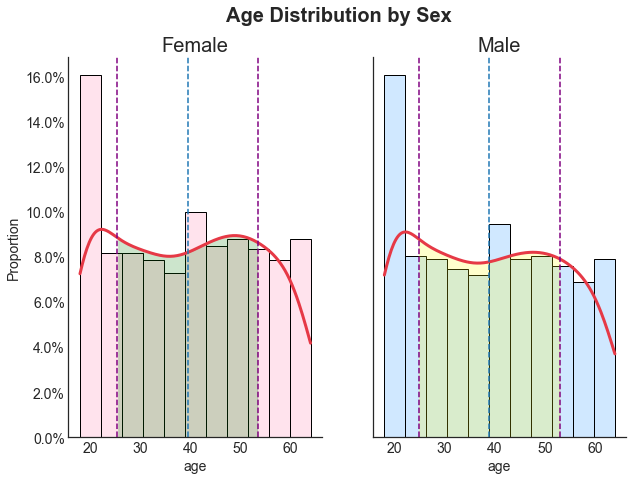

In [117]:
with plt.style.context(seaborn):
    rcParams['axes.titleweight'] = 'normal'
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7))
    
    sns.histplot(
        ax=ax1, 
        data=get_female, 
        x='age', 
        color=female_cat, 
        edgecolor='black', 
        kde=True,
        line_kws={'linewidth': 3, 'linestyle':'-'},
        stat='proportion')
    sns.histplot(
        ax=ax2, 
        data=get_male, 
        x='age', 
        color=male_cat, 
        edgecolor='black', 
        kde=True,
        line_kws={'linewidth': 3, 'linestyle':'-'},
        stat='proportion')

    ax1.axvline(x=get_female['age'].mean(), linestyle='--', label=f'Mean: {get_female.age.mean():.0f}-y-o.')
    ax1.axvline(
        x=get_female['age'].mean()+get_female['age'].std(), 
        linestyle='--', 
        label=f'Std: {get_female.age.std():.0f}-y-o.',
        color='purple')
    ax1.axvline(
        x=get_female['age'].mean()-get_female['age'].std(), 
        linestyle='--',
        color='purple')

    kde_x, kde_y = ax1.lines[0].get_data() # for fill_between

    ax1.fill_between(
        kde_x, 
        kde_y, 
        where=(
            kde_x>get_female.age.mean() - get_female.age.std()) & (kde_x<get_female.age.mean() + get_female.age.std()
            ), 
        color='green', 
        alpha=0.2)

    ax2.axvline(x=get_male['age'].mean(), linestyle='--', label=f'Mean: {get_male.age.mean():.0f}-y-o.')
    ax2.axvline(
        x=get_male['age'].mean()+get_male['age'].std(), 
        linestyle='--', 
        label=f'Std: {get_male.age.std():.0f}-y-o.',
        color='purple')
    ax2.axvline(
        x=get_male['age'].mean()-get_male['age'].std(), 
        linestyle='--',
        color='purple')

    kde_x, kde_y = ax2.lines[0].get_data() # for fill_between

    ax2.fill_between(
        kde_x, 
        kde_y, 
        where=(
            kde_x>get_male.age.mean() - get_male.age.std()) & (kde_x<get_male.age.mean() + get_male.age.std()
            ), 
        color='yellow', 
        alpha=0.2)

    plt.suptitle('Age Distribution by Sex')

    ax2.set_title('Male')
    ax2.set(ylabel=None)
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks

    ax1.set_title('Female')
    ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)

    ax1.lines[0].set_color(density_red)
    ax2.lines[0].set_color(density_red)

    tick_spacing = 0.02
    ax1.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

In [118]:
print(f'Male, mean: {get_male.age.mean():.2f}')
print(f'Male, std: {get_male.age.std():.2f}')
print(f'Female, mean: {get_female.age.mean():.2f}')
print(f'Female, std: {get_female.age.std():.2f}')

Male, mean: 38.94
Male, std: 14.03
Female, mean: 39.47
Female, std: 14.07


### Smoker and Non-Smoker

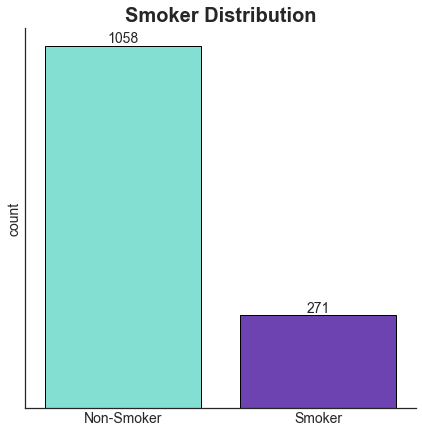

In [119]:
sex_counts = insurance_data['smoker'].value_counts().rename_axis('smoker').reset_index(name='count')
smoker_labels = ['Non-Smoker', 'Smoker']

with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))

    sns.barplot(
        ax=ax,
        data=sex_counts,
        x='smoker',
        y='count',
        palette=smoker_pal,
        **barset)
    ax.set_xticklabels(smoker_labels)
    ax.set_title('Smoker Distribution', fontweight='bold')
    ax.set(xlabel=None)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks

    ax.bar_label(ax.containers[0], fontsize=14, fmt='%d')

    plt.show();

#### Smoker Status by Sex

In [120]:
yn_smoker_sex = pd.DataFrame(
    insurance_data.groupby(['sex', 'smoker'])
    .count()['charges'])

yn_smoker_sex['percentage (%)'] = ((yn_smoker_sex['charges']*100)/yn_smoker_sex['charges'].sum())

yn_smoker_sex

charges  percentage (%)
sex    smoker                         
female no          546       41.083521
       yes         113        8.502634
male   no          512       38.525207
       yes         158       11.888638

In [121]:
# prepare data for plotting
smoker_percent_list = yn_smoker_sex['percentage (%)'].to_list()
smoker_sex_list = smoker_percent_list[::2]
no_smoker_sex_list = smoker_percent_list[1::2]
sex_labels = ['Female', 'Male']

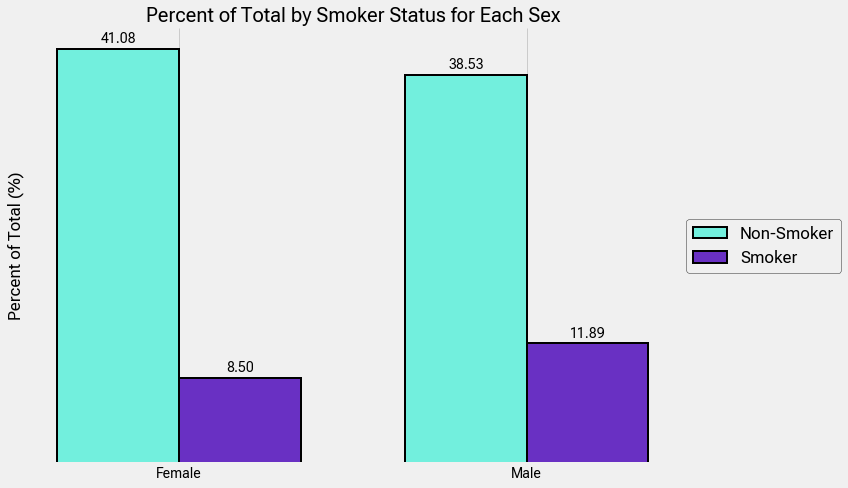

In [122]:
with plt.style.context(mpl):
    x = np.arange(len(smoker_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(
        x - width/2, 
        smoker_sex_list, 
        width, 
        label='Non-Smoker',
        color=nosmoker_cat,
        edgecolor='black',
        linewidth=2)
    rects2 = ax.bar(
        x + width/2, 
        no_smoker_sex_list, 
        width, 
        label='Smoker',
        color=smoker_cat,
        edgecolor='black',
        linewidth=2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent of Total (%)')
    ax.set_title('Percent of Total by Smoker Status for Each Sex', fontsize=20)
    ax.set_xticks(x, sex_labels)
    ax.yaxis.set_major_locator(plt.NullLocator()) 
    ax.xaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large', edgecolor='black')
    
    ax.bar_label(rects1, padding=3, fontsize=14, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fontsize=14, fmt='%.2f')

    fig.tight_layout()

    plt.show();


### Smoker Age by Sex

In [123]:
smoker = insurance_data.loc[insurance_data['smoker'] == 'yes']
no_smoker = insurance_data.loc[insurance_data['smoker'] == 'no']

male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']  

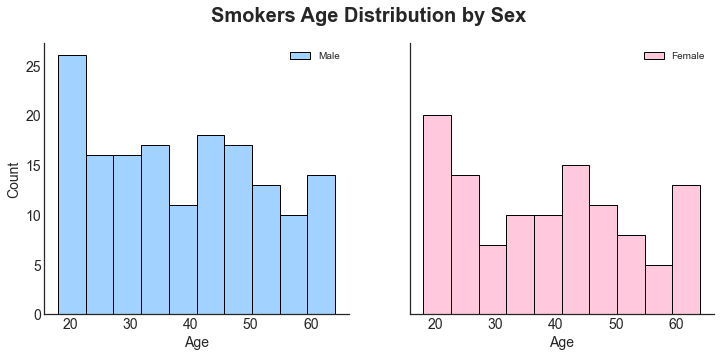

In [124]:
with plt.style.context(seaborn): # set temporary style
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True,sharex=True)

    ax1.hist(
        male_smoker['age'], 
        edgecolor='black', 
        color=male_cat, 
        label='Male')
    ax2.hist(
        female_smoker['age'], 
        edgecolor='black', 
        color=female_cat, 
        label='Female')

    ax1.grid(visible=False)
    ax2.grid(visible=False)

    plt.suptitle("Smokers Age Distribution by Sex", fontsize=20)

    ax1.set(xlabel='Age', ylabel='Count')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)
    
    ax2.set(xlabel='Age')
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_tick_params(labelsize=14)

    
    ax1.legend()
    ax2.legend()
    plt.show();

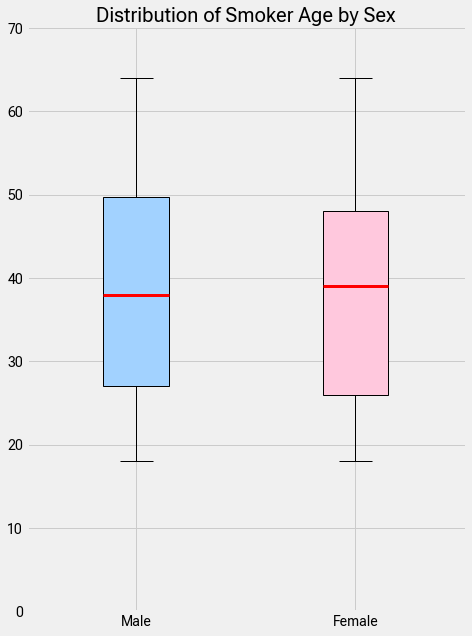

In [125]:
male_smoker = smoker[smoker['sex'] == 'male']  
female_smoker = smoker[smoker['sex'] == 'female']
labels = ['Male', 'Female']  
data1 = [male_smoker['age'], female_smoker['age']]

with plt.style.context(mpl):
    fig, ax = plt.subplots(figsize=(7, 10))

    bp = ax.boxplot(
        data1, 
        vert=True, 
        patch_artist=True, 
        widths = 0.3)

    ax.grid(visible=True)
    ax.set_xticklabels(['Male', 'Female']) 
    ax.set_ylim(0, 70)
    ax.set_title('Distribution of Smoker Age by Sex', fontsize=20)

    # set box colours
    colors = [male_cat, female_cat] 
    for patch, color in zip(bp['boxes'], colors): patch.set_facecolor(color) 
    
    # changing colours and linewidth of medians 
    for median in bp['medians']: median.set(color ='red', linewidth = 3) 


### BMI Distribution

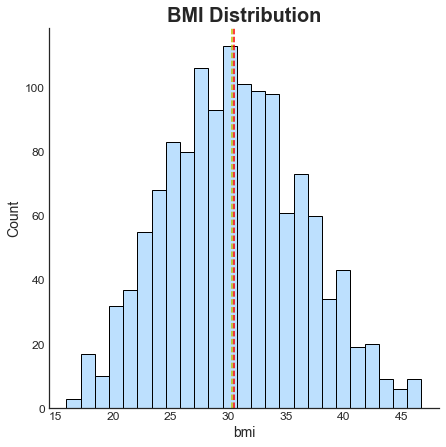

In [126]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    sns.histplot(
        ax=ax,
        data=insurance_data,
        x='bmi',
        edgecolor='black',
        facecolor=distribution_blue,
        bins=25
        )

    ax.axvline(insurance_data.bmi.mean(), color='r',linestyle='--')
    ax.axvline(insurance_data.bmi.median(), color='y',linestyle='--')
    
    ax.set_title("BMI Distribution", fontsize=20)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)

    plt.show();

#### Smoker BMI Mean & Median & Mode 

In [127]:
smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not

smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[1] # 1 = yes, 0 = not

smokerBMI_mode = ((
    insurance_data.loc[insurance_data['smoker'] == 'yes']
    )['bmi']
    ).agg(pd.Series.mode)[0]

#### Non-smoker BMI Mean & Median & Mode

In [128]:
no_smokerBMI_mean = (
    insurance_data
    .groupby(['smoker'])
    .mean()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not

no_smokerBMI_median = (
    insurance_data
    .groupby(['smoker'])
    .median()
    ['bmi'] #
    )[0] # 1 = yes, 0 = not

no_smokerBMI_mode = ((
    insurance_data.loc[insurance_data['smoker'] == 'no']
    )['bmi']
    ).agg(pd.Series.mode)[0]

In [129]:
bmi_stats = pd.DataFrame(
    {
    'Mean': [smokerBMI_mean, no_smokerBMI_mean],
    'Median': [smokerBMI_median, no_smokerBMI_mean],
    'Mode': [smokerBMI_mode, no_smokerBMI_mode],
    }, index=['Smoker', 'Non-Smoker'])

bmi_stats = bmi_stats\
    .style\
        .background_gradient(cmap=minMax)\
        .set_properties(**{'font-size': '20px'})

bmi_stats

,Mean,Median,Mode
Smoker,30.503782,30.360000,28.310000
Non-Smoker,30.545945,30.545945,32.300000


BMI of Non-Smokers are slightly higher?

#### Smoker Status by BMI

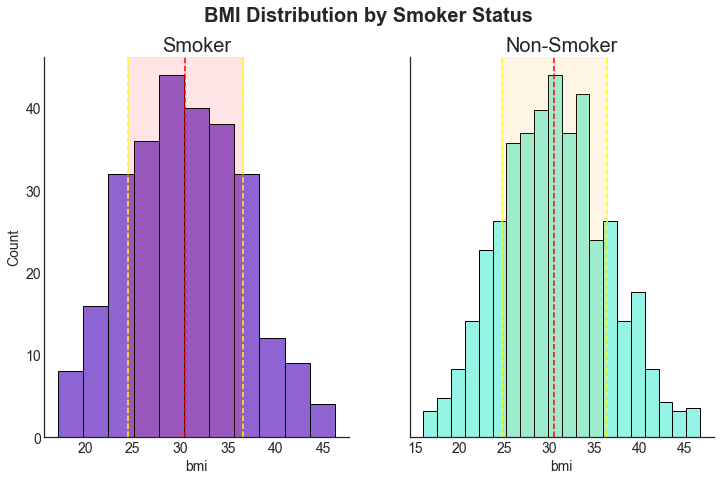

In [130]:
with plt.style.context(seaborn):
    rcParams['axes.titleweight'] = 'normal'
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))

    sns.histplot(
        ax=ax1,
        data=smoker,
        x='bmi',
        color=smoker_cat)
    sns.histplot(
        ax=ax2,
        data=no_smoker,
        x='bmi',
        color=nosmoker_cat)
    
    ax1.axvline(x=smoker['bmi'].mean(), linestyle='--', label=f'Mean: {smoker.bmi.mean():.0f}-y-o.', color='red')
    ax1.axvline(
        x=smoker['bmi'].mean()+smoker['bmi'].std(), 
        linestyle='--', 
        label=f'Std: {smoker.bmi.std():.0f}-y-o.',
        color='yellow')
    ax1.axvline(
        x=smoker['bmi'].mean()-smoker['bmi'].std(), 
        linestyle='--',
        color='yellow')

    ax1.axvspan(smoker.bmi.mean()-smoker.bmi.std(), smoker.bmi.mean()+smoker.bmi.std(), alpha=0.1, color='red')

    ax2.axvline(x=no_smoker['bmi'].mean(), linestyle='--', label=f'Mean: {no_smoker.bmi.mean():.0f}-y-o.', color='red')
    ax2.axvline(
        x=no_smoker['bmi'].mean()+no_smoker['bmi'].std(), 
        linestyle='--', 
        label=f'Std: {no_smoker.bmi.std():.0f}-y-o.',
        color='yellow')
    ax2.axvline(
        x=no_smoker['bmi'].mean()-no_smoker['bmi'].std(), 
        linestyle='--',
        color='yellow')

    ax2.axvspan(no_smoker.bmi.mean()-no_smoker.bmi.std(), no_smoker.bmi.mean()+no_smoker.bmi.std(), alpha=0.1, color='orange')

    plt.suptitle('BMI Distribution by Smoker Status')

    ax2.set_title('Non-Smoker')
    ax2.set(ylabel=None)
    ax2.xaxis.set_tick_params(labelsize=14)
    ax2.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks

    ax1.set_title('Smoker')
    ax1.xaxis.set_tick_params(labelsize=14)
    ax1.yaxis.set_tick_params(labelsize=14)

    plt.show();

Non-Smoker's BMI is indeed slighly higher. But what about the charges?

### Variance of Charges

In [131]:
# smoker
smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'yes']
    ['charges']
    .var()
    )
    
# non-smoker
non_smoker_charges_var = (
    insurance_data
    .loc[insurance_data['smoker'] == 'no']
    ['charges']
    .var()
)

In [132]:
charges_variance_stats = pd.DataFrame(
    {
    'Variance': [numerize(smoker_charges_var), numerize(non_smoker_charges_var)],
    'Standard Deviation': [numerize(sqrt(smoker_charges_var)), numerize(sqrt(non_smoker_charges_var))]
    }, index=['Smoker', 'Non-Smoker'])

charges_variance_stats

,Variance,Standard Deviation
Smoker,129.61M,11.38K
Non-Smoker,36.03M,6K


### Charges by Sex, Smoker, and Age 

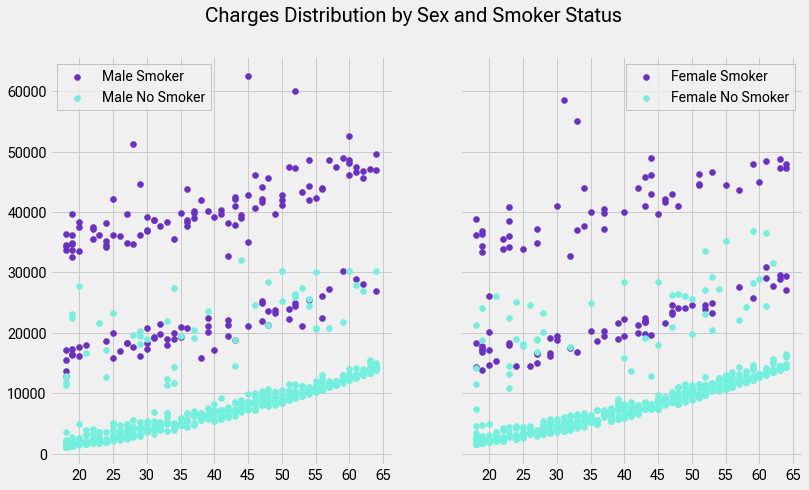

In [133]:
# male and female smoker are already present
# get non smokers category by sex
male_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'male')]

female_no_smoker = insurance_data.loc[
    (insurance_data['smoker'] == 'no')
    &
    (insurance_data['sex'] == 'female')]

with plt.style.context(mpl):  
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker['age'], 
        male_smoker['charges'], 
        c=smoker_cat, 
        label='Male Smoker')
    ax2.scatter(
        female_smoker['age'], 
        female_smoker['charges'], 
        c=smoker_cat, 
        label='Female Smoker')
    ax1.scatter(
        male_no_smoker['age'], 
        male_no_smoker['charges'], 
        c=nosmoker_cat, 
        label='Male No Smoker')
    ax2.scatter(
        female_no_smoker['age'], 
        female_no_smoker['charges'], 
        c=nosmoker_cat, 
        label='Female No Smoker')

    ax1.legend(fontsize='medium', edgecolor='gray', fancybox=False)
    ax2.legend(fontsize='medium', edgecolor='gray', fancybox=False)

    plt.suptitle("Charges Distribution by Sex and Smoker Status")

    tick_spacing = 5
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

### Charges by BMI and Sex for Age > 25

In [134]:
male_smoker_bmi25 = male_smoker.loc[male_smoker['bmi'] > 25]
male_no_smoker_bmi25 = male_no_smoker.loc[male_no_smoker['bmi'] > 25]
female_no_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]
female_smoker_bmi25 = female_no_smoker.loc[female_no_smoker['bmi'] > 25]

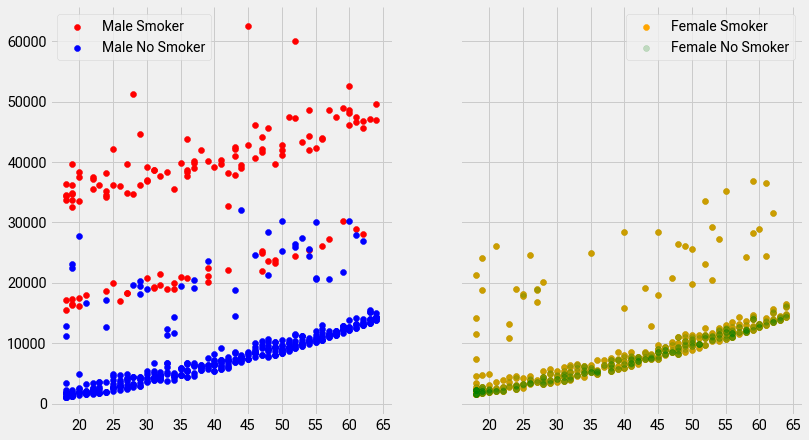

In [135]:
with plt.style.context(mpl): 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker_bmi25['age'],
         male_smoker_bmi25['charges'], 
         c='red', 
         label='Male Smoker')
    ax2.scatter(
        female_smoker_bmi25['age'], 
        female_smoker_bmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax1.scatter(
        male_no_smoker_bmi25['age'], 
        male_no_smoker_bmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax2.scatter(
        female_no_smoker_bmi25['age'], 
        female_no_smoker_bmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)

    tick_spacing = 5

    ax1.legend()
    ax2.legend()

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

### Charges by BMI and Sex for Age < 25

In [136]:
male_smoker_lbmi25 = male_smoker.loc[male_smoker['bmi'] < 25]
male_no_smoker_lbmi25 = male_no_smoker.loc[male_no_smoker['bmi'] < 25]
female_no_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]
female_smoker_lbmi25 = female_no_smoker.loc[female_no_smoker['bmi'] < 25]

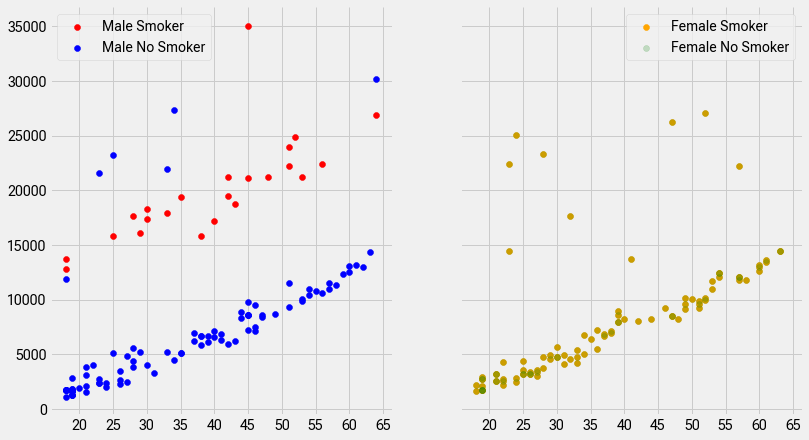

In [137]:
with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker_lbmi25['age'], 
        male_smoker_lbmi25['charges'], 
        c='red', 
        label='Male Smoker')
    ax2.scatter(
        female_smoker_lbmi25['age'], 
        female_smoker_lbmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax1.scatter(
        male_no_smoker_lbmi25['age'], 
        male_no_smoker_lbmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax2.scatter(
        female_no_smoker_lbmi25['age'], 
        female_no_smoker_lbmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)

    tick_spacing = 5

    ax1.legend()
    ax2.legend()

    ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    plt.show();

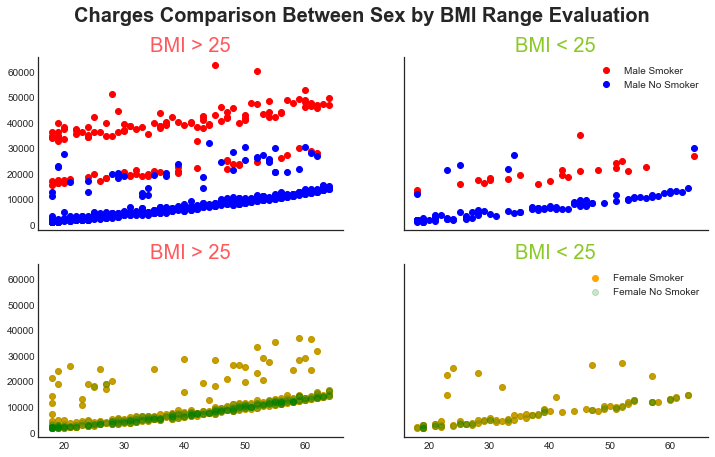

In [138]:
with plt.style.context(seaborn):
    rcParams['axes.titleweight'] = 'normal'
    
    fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2,  figsize=(12, 7), sharey=True,sharex=True)

    ax1.scatter(
        male_smoker_bmi25['age'], 
        male_smoker_bmi25['charges'], 
        c='red', 
        label='Male Smoker')
    ax1.scatter(
        male_no_smoker_bmi25['age'], 
        male_no_smoker_bmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax2.scatter(
        male_smoker_lbmi25['age'], 
        male_smoker_lbmi25['charges'], 
        c='red', 
        label='Male Smoker')
    ax2.scatter(
        male_no_smoker_lbmi25['age'], 
        male_no_smoker_lbmi25['charges'], 
        c='blue', 
        label='Male No Smoker')
    ax3.scatter(
        female_smoker_bmi25['age'], 
        female_smoker_bmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax3.scatter(
        female_no_smoker_bmi25['age'], 
        female_no_smoker_bmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)
    ax4.scatter(
        female_smoker_lbmi25['age'], 
        female_smoker_lbmi25['charges'], 
        c='orange', 
        label='Female Smoker')
    ax4.scatter(
        female_no_smoker_lbmi25['age'], 
        female_no_smoker_lbmi25['charges'], 
        c='green', 
        label='Female No Smoker', 
        alpha=0.2)
    
    plt.suptitle('Charges Comparison Between Sex by BMI Range Evaluation')

    ax1.set_title('BMI > 25', color=bmiM25_cat)
    ax2.set_title('BMI < 25', color=bmiL25_cat)
    ax3.set_title('BMI > 25', color=bmiM25_cat)
    ax4.set_title('BMI < 25', color=bmiL25_cat)

    ax2.legend()
    ax4.legend()
    plt.show();

### Comparing BMI by Sex

In [139]:
male1 = insurance_data.loc[insurance_data['sex'] == 'male']
female1 = insurance_data.loc[insurance_data['sex'] == 'female']

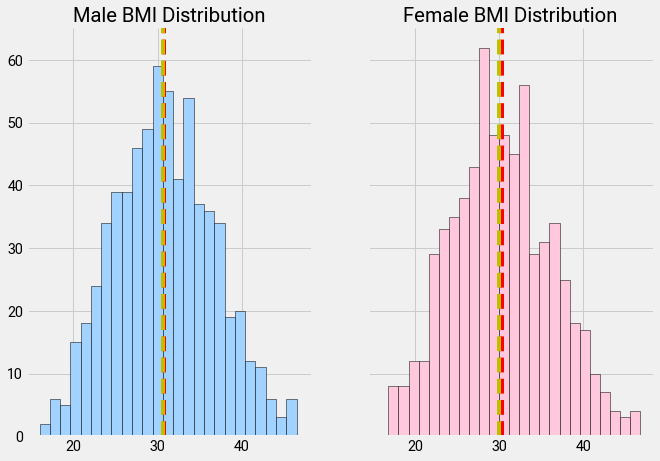

In [140]:
with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True, sharey=True)
    
    ax1.hist(
        male1['bmi'], 
        edgecolor='black',
        color=male_cat,
        bins=25)
        
    ax1.axvline(male1['bmi'].mean(), c='r', linestyle='--', label='BMI of Male Mean')
    ax1.axvline(male1['bmi'].median(), c='y', linestyle='--', label='BMI of Male Median')

    ax2.hist(
        female1['bmi'], 
        edgecolor='black',
        color=female_cat,
        bins=25)
    
    ax2.axvline(female1['bmi'].mean(), c='r', linestyle='--', label='BMI of Female Mean')
    ax2.axvline(female1['bmi'].median(), c='y', linestyle='--', label='BMI of Female Median')

    ax1.set(title='Male BMI Distribution')
    ax2.set(title='Female BMI Distribution')

    plt.show();

### Comparing BMI by Smoker Status

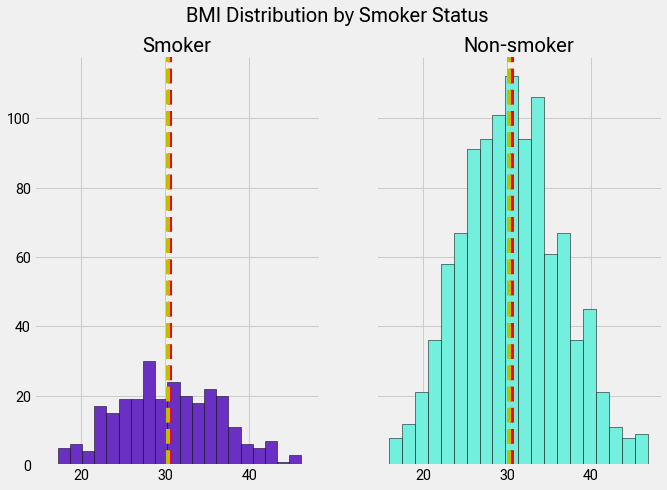

In [141]:
bmi_smoker = insurance_data[insurance_data['smoker'] == 'yes']  
bmi_no_smoker = insurance_data[insurance_data['smoker'] == 'no']

with plt.style.context(mpl):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharey=True,sharex=True)

    ax1.hist(
        bmi_smoker['bmi'], 
        edgecolor='black',
        color=smoker_cat,
        bins=20)

    ax1.axvline(bmi_smoker['bmi'].mean(), c='r', linestyle='--', label='BMI of Smoker Mean')
    ax1.axvline(bmi_smoker['bmi'].median(), c='y', linestyle='--', label='BMI of Smoker Median')

    ax2.hist(
        bmi_no_smoker['bmi'], 
        edgecolor='black',
        color=nosmoker_cat,
        bins=20)

    ax2.axvline(bmi_no_smoker['bmi'].mean(), c='r', linestyle='--', label='BMI of Non-smoker Mean')
    ax2.axvline(bmi_no_smoker['bmi'].median(), c='y', linestyle='--', label='BMI of Non-smoker Median')

    ax1.grid(visible=True)
    ax2.grid(visible=True)

    ax1.set(title="Smoker")
    ax2.set(title="Non-smoker")
    plt.suptitle("BMI Distribution by Smoker Status")

    plt.show();

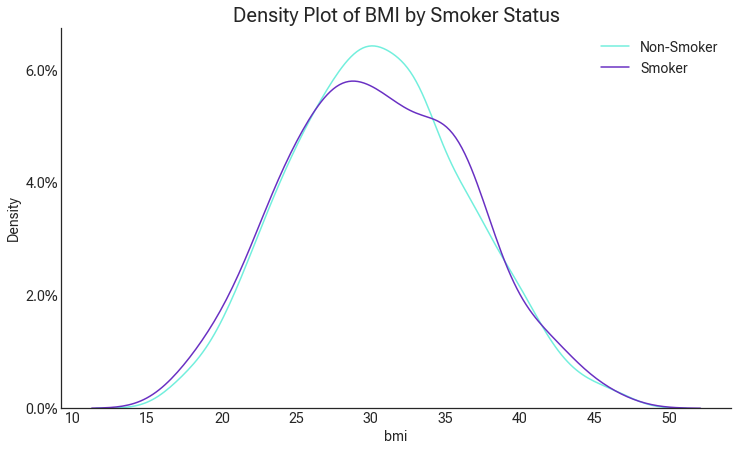

In [142]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.kdeplot(
        ax=ax, 
        data=bmi_no_smoker, 
        x='bmi', 
        color=nosmoker_cat, 
        label='Non-Smoker')
    sns.kdeplot(
        ax=ax, 
        data=bmi_smoker, 
        x='bmi', 
        color=smoker_cat, 
        label='Smoker')

    ax.set_title('Density Plot of BMI by Smoker Status', fontsize=20)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    # Hide 0 on y-axis
    ax.yaxis.get_major_ticks()[0].label1.set_visible(False)

    tick_spacing = 0.02
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.legend(fontsize=14)


## Categorical Variable Analysis (PMF)

### Top Charges by Sex

In [143]:
top_charges_sex = (insurance_data.groupby(
    ['sex']
    )['charges']
    ).max()\
        .reset_index()
        
top_charges_sex

,sex,charges
0,female,58571.07448
1,male,62592.87309


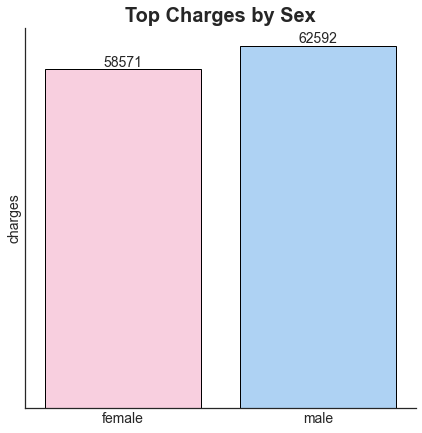

In [144]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    kwargs = {'edgecolor':'black', 'linewidth':1}
    
    sns.barplot(
        ax=ax, 
        data=top_charges_sex, 
        x='sex', 
        y='charges', 
        palette=sex_pal,
        **kwargs)
        
    ax.set_title('Top Charges by Sex')
    ax.set(xlabel=None)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks
    
    ax.bar_label(ax.containers[0], fontsize=14, fmt='%d')

    plt.show();

### Probability Distribution of Charges in Each Region 

In [145]:
# get charges by region
charges_region = (insurance_data.groupby(
    ['region']
    )['charges']
    ).count()\
        .reset_index()

# get probability for each region charges
charges_region['probability'] = charges_region['charges']/charges_region['charges'].sum() 

charges_region

,region,charges,probability
0,northeast,323,0.243040
1,northwest,325,0.244545
2,southeast,357,0.268623
3,southwest,324,0.243792


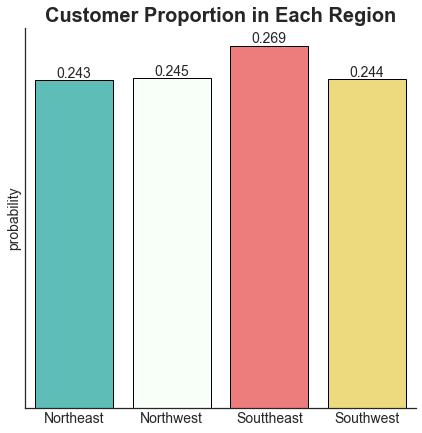

In [146]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(7, 7))
    kwargs = {'edgecolor':'black', 'linewidth':1}

    idx = ['Northeast', 'Northwest', 'Souttheast', 'Southwest']

    sns.barplot(
        ax=ax, 
        data=charges_region, 
        x="region", 
        y="probability", 
        palette=region_pal,
        **kwargs
        )
    ax.set_title('Customer Proportion in Each Region')
    ax.set(xlabel=None)
    ax.set_xticklabels(idx)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_major_locator(plt.NullLocator()) # Remove Y-Axis Ticks
    
    ax.bar_label(ax.containers[0], fontsize=14, fmt='%.3f')

    plt.show();

#### Distribution of Smokers and Non Smokers in each Region

In [147]:
yn_smoker_region = pd.DataFrame(
    insurance_data.groupby(['region', 'smoker'])
    .count()['charges'])

yn_smoker_region['percentage (%)'] = ((yn_smoker_region['charges']*100)/yn_smoker_region['charges'].sum())

yn_smoker_region

charges  percentage (%)
region    smoker                         
northeast no          256       19.262603
          yes          67        5.041384
northwest no          267       20.090293
          yes          58        4.364184
southeast no          268       20.165538
          yes          89        6.696764
southwest no          267       20.090293
          yes          57        4.288939

In [148]:
# prepare data for plotting
region_percent_list = yn_smoker_region['percentage (%)'].to_list()
smoker_region_list = region_percent_list[::2]
no_smoker_region_list = region_percent_list[1::2]
region_labels = ['Northeast', 'Northwest', 'Souttheast', 'Southwest']

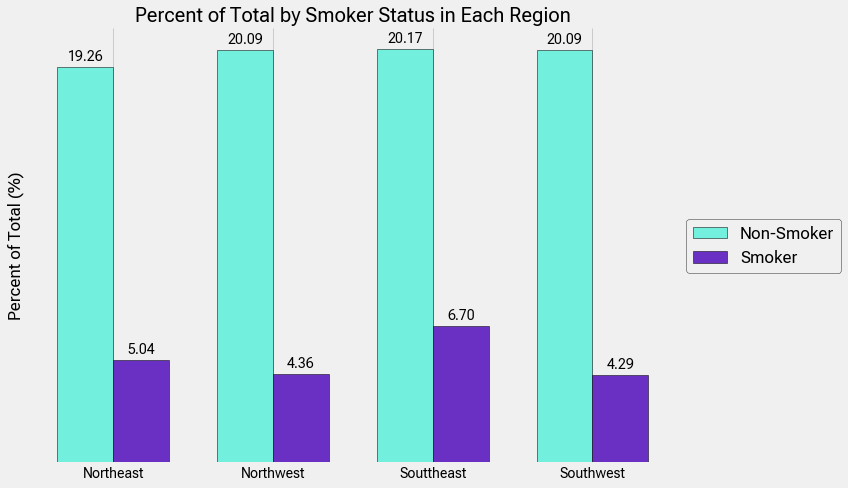

In [149]:
with plt.style.context(mpl):
    x = np.arange(len(region_labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    rects1 = ax.bar(
        x - width/2, 
        smoker_region_list, 
        width, 
        label='Non-Smoker',
        color=nosmoker_cat,
        edgecolor='black')
    rects2 = ax.bar(
        x + width/2, 
        no_smoker_region_list, 
        width, 
        label='Smoker',
        color=smoker_cat,
        edgecolor='black')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Percent of Total (%)')
    ax.set_title('Percent of Total by Smoker Status in Each Region', fontsize=20)
    ax.set_xticks(x, region_labels)
    ax.yaxis.set_major_locator(plt.NullLocator()) 
    ax.xaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='black', fontsize='large')
    
    ax.bar_label(rects1, padding=3, fontsize=14, fmt='%.2f')
    ax.bar_label(rects2, padding=3, fontsize=14, fmt='%.2f')

    fig.tight_layout()

    plt.show()


<hr>

### Probability of a Smoker is a Female

In [150]:
prob_female = (insurance_data['sex'] == 'female')
prob_male = (insurance_data['sex'] == 'male')
prob_smoker = (insurance_data['smoker'] == 'yes')
prob_no_smoker = (insurance_data['smoker'] == 'no')

In [151]:
female_given_smoker = conditional(prob_female, given=prob_smoker)

print_format(female_given_smoker, 2)

0.42


#### Probability of a Smoker is a Male

In [152]:
male_given_smoker = conditional(prob_male, given=prob_smoker)

print_format(male_given_smoker, 2)

0.58


#### Distribution of Charges in Each Region by Age

In [153]:
southeast_charges = insurance_data.loc[insurance_data['region'] == 'southeast']
southwest_charges = insurance_data.loc[insurance_data['region'] == 'southwest']
northeast_charges = insurance_data.loc[insurance_data['region'] == 'northeast']
northwest_charges = insurance_data.loc[insurance_data['region'] == 'northwest']

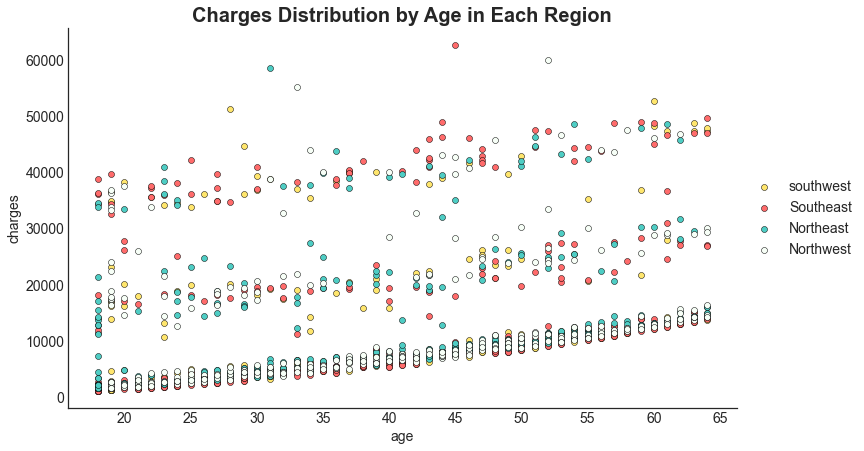

In [154]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.scatterplot(
        ax=ax,
        x=southwest_charges['age'], 
        y=southwest_charges['charges'],
        color=region_pal['southwest'],
        edgecolor="black",
        label='southwest')
    sns.scatterplot(
        ax=ax,
        x=southeast_charges['age'], 
        y=southeast_charges['charges'],
        color=region_pal['southeast'],
        edgecolor="black",
        label='Southeast')
    sns.scatterplot(
        ax=ax,
        x=northeast_charges['age'], 
        y=northeast_charges['charges'],
        color=region_pal['northeast'],
        edgecolor="black",
        label='Northeast')
    sns.scatterplot(
        ax=ax,
        x=northwest_charges['age'], 
        y=northwest_charges['charges'],
        color=region_pal['northwest'],
        edgecolor="black",
        label='Northwest')
        
    ax.set_title('Charges Distribution by Age in Each Region')
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='black', fontsize=14)

    tick_spacing = 5
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    
    plt.show();

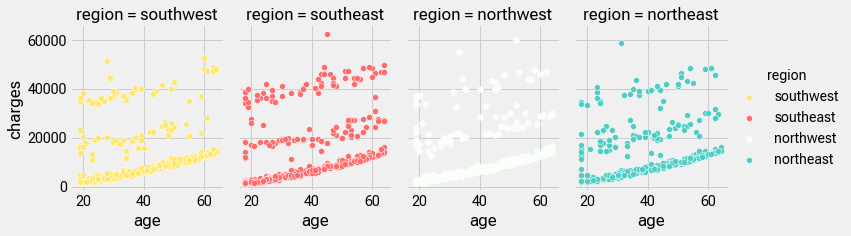

In [155]:
with plt.style.context(mpl):
    grid = sns.FacetGrid(
        insurance_data, 
        col='region', 
        hue='region', 
        col_wrap=4, 
        height=3.5, 
        aspect=.75, 
        palette=region_pal)
    grid.map(sns.scatterplot, 'age', 'charges')
    
    grid.add_legend()

    plt.show();

## Continous Variable Analysis

### Probability of Charge by BMI

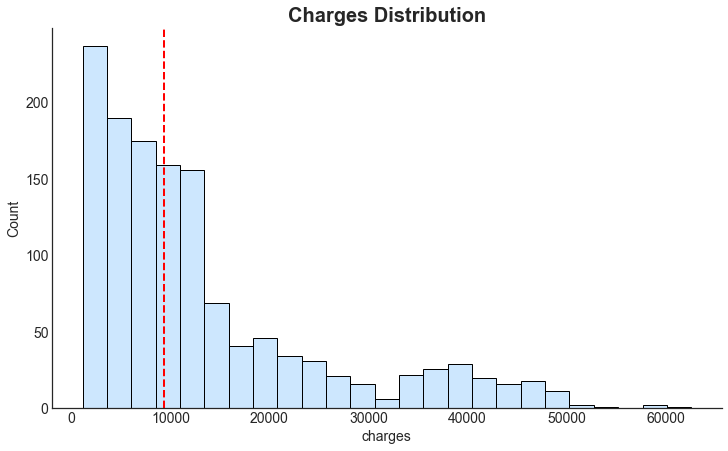

In [156]:
with plt.style.context(seaborn):
    fig, ax = plt.subplots(figsize=(12, 7))
    sns.histplot(
        ax=ax,
        data=insurance_data,
        x='charges',
        edgecolor='black',
        bins=25,
        color=distribution_blue)

    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    ax.axvline(insurance_data['charges'].median(), linestyle='--', c='red', linewidth=2)
    
    ax.set_title('Charges Distribution')
    plt.show();

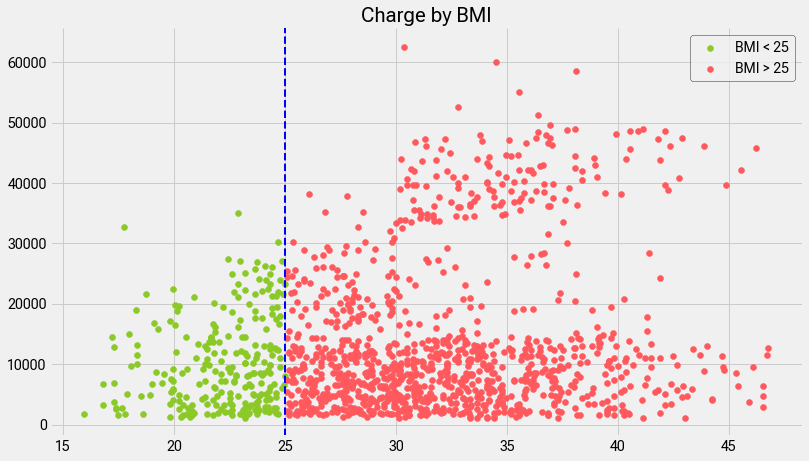

In [157]:
bmi_l25 = insurance_data[insurance_data['bmi'] < 25]
bmi_m25 = insurance_data[insurance_data['bmi'] > 25]

with plt.style.context(mpl): 
    fig, ax = plt.subplots(figsize=(12, 7))

    ax.scatter(
        bmi_l25['bmi'], 
        bmi_l25['charges'], 
        c=bmiL25_cat, 
        label='BMI < 25')
    ax.scatter(
        bmi_m25['bmi'], 
        bmi_m25['charges'], 
        c=bmiM25_cat, 
        label='BMI > 25')

    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    ax.axvline(x = 25, color = 'blue', linestyle='--', linewidth=2)
    ax.set_title('Charge by BMI')
    ax.legend(edgecolor='black', fontsize=14)

    plt.show();

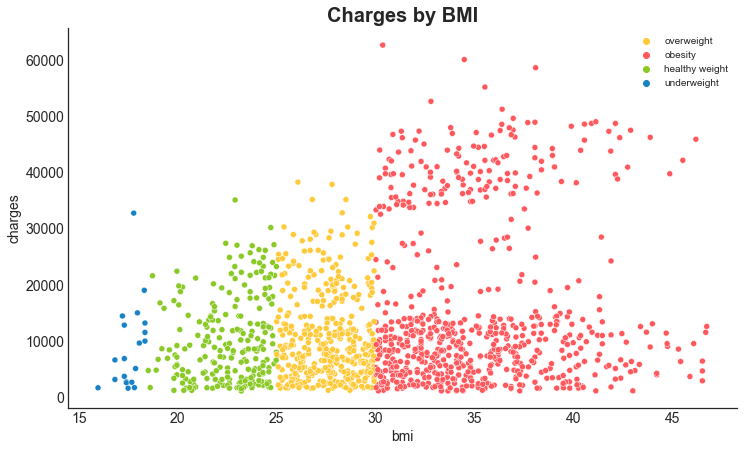

In [158]:
with plt.style.context(seaborn): 
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.scatterplot(
        data=insurance_data, 
        x='bmi', 
        y='charges',
        hue='bmi_status',
        palette=bmi_pal)
        
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.set_title('Charges by BMI')
    ax.legend()
    
    plt.show();

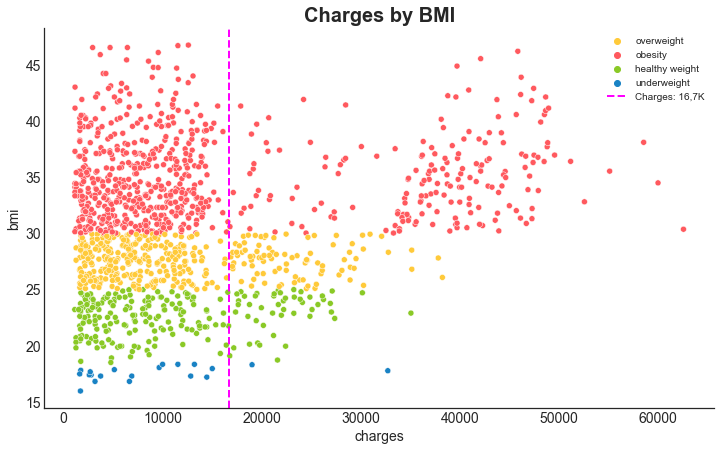

In [159]:
with plt.style.context(seaborn): 
    fig, ax = plt.subplots(figsize=(12, 7))

    sns.scatterplot(
        data=insurance_data, 
        x='charges', 
        y='bmi',
        hue='bmi_status',
        palette=bmi_pal)
        
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.set_title('Charges by BMI')
    ax.axvline(16700, linewidth=2, linestyle='--', color='magenta', label='Charges: 16,7K')
    
    ax.legend()
    
    plt.show();

<hr>

### So, what's actually considered paying higher than most people?
Let's assume those who in Q3 are considered paying more than most people

In [160]:
insurance_data['charges'].quantile(0.75)

16586.49771

Let's take 16,7K as a threshold

### Weighting Chances

In [161]:
charge16_7 = (insurance_data['charges'] > 16_700)
bmi_m25 = (insurance_data['bmi'] > 25)
bmi_l25 = (insurance_data['bmi'] < 25)
underweight = (insurance_data['bmi_status'] == 'underweight')
healthy_weight = (insurance_data['bmi_status'] == 'healthy weight')
overweight = (insurance_data['bmi_status'] == 'overweight')
obesity = (insurance_data['bmi_status'] == 'obesity')

In [162]:
s_g_hc = conditional(charge16_7, given=prob_smoker)
ns_g_hc = conditional(charge16_7, given=prob_no_smoker)
under_g_hc = conditional(charge16_7, given=underweight)
healthy_g_hc = conditional(charge16_7, given=healthy_weight)
overweight_g_hc = conditional(charge16_7, given=overweight)
obese_g_hc = conditional(charge16_7, given=obesity)
under_s_hc = conditional(charge16_7, given=underweight&prob_smoker)
healthy_s_hc = conditional(charge16_7, given=healthy_weight&prob_smoker)
over_s_hc = conditional(charge16_7, given=overweight&prob_smoker)
obese_s_hc = conditional(charge16_7, given=obesity&prob_smoker)
under_ns_hc = conditional(charge16_7, given=underweight&prob_no_smoker)
healthy_ns_hc = conditional(charge16_7, given=healthy_weight&prob_no_smoker)
over_ns_hc = conditional(charge16_7, given=overweight&prob_no_smoker)
obese_ns_hc = conditional(charge16_7, given=obesity&prob_no_smoker)
bmiM25_ch = conditional(charge16_7, given=bmi_m25)
bmiL25_ch = conditional(charge16_7, given=bmi_l25)

chance_array = [s_g_hc, ns_g_hc, under_g_hc, healthy_g_hc, overweight_g_hc, obese_g_hc, under_s_hc, healthy_s_hc, over_s_hc, obese_s_hc, under_ns_hc, healthy_ns_hc, over_ns_hc, obese_ns_hc, bmiM25_ch, bmiL25_ch]

high_col = [] # col 1
low_col= [] # col 2
for i in chance_array:
    high_col.append(round(i, 3)*100)
for i in high_col:
    low_col.append(round(100-i, 3))

chances = pd.DataFrame({
    'Higher Charge Chance (%)': high_col,
    'Lower Charge Chance (%)': low_col,
    }, index=['Smoker (1)', 'Non-Smoker (2)', 'Underweight (3)', 'Healthy Weight (4)', 'Overweight (5)', 'Obesity (6)', 'Underweight & Smoker (7)', 'Healthy Weight & Smoker (8)', 'Overweight & Smoker (9)', 'Obesity & Smoker (10)', 'Underweight & Non-Smoker (11)', 'Healthy Weight & Non-Smoker (12)', 'Overweight & Non-Smoker (13)', 'Obesity & Non-Smoker (14)', 'BMI > 25 (15)', 'BMI < 25 (16)'])

chances_df = chances.round(decimals=3)
chances_df.index.name='Given Condition'

chances_map = chances_df\
    .style\
        .background_gradient(cmap=minMax)\
        .set_properties(**{'font-size': '20px'})

chances_map

,Higher Charge Chance (%),Lower Charge Chance (%)
Given Condition,,
Smoker (1),92.600000,7.400000
Non-Smoker (2),7.600000,92.400000
Underweight (3),10.000000,90.000000
Healthy Weight (4),21.800000,78.200000
Overweight (5),23.800000,76.200000
Obesity (6),26.900000,73.100000
Underweight & Smoker (7),40.000000,60.000000
Healthy Weight & Smoker (8),74.000000,26.000000
Overweight & Smoker (9),94.600000,5.400000


For all 4 categories of BMI, there are higher chances of getting lower charges. But as soon as we include smoker status, the probability of getting higher charges is increasing significantly. So, despite getting high BMI than what's considered healthy weight, charges are actually in the lower level.

#### If someone is a Smoker, what's the chance of getting higher charge?

In [163]:
chance(chances, 1, 'high')

92.60000000000001

So, if we know that a customer is a smoker, the chances of getting higher charges is 92.6%. 

#### If someone is overweight and a smoker, what's the chance of getting higher charge?

In [164]:
chance(chances, 9, 'high')

94.6

If we know the customer is a smoker and is overweight, the chance of getting higher charge is 98%

#### But if someone is in healthy range, but a smoker, what's the chance of getting higher charge?

In [165]:
chance(chances, 8, 'high')

74.0

If the customer is healthy, but a smoker, the chance of getting higher charge is around 71%. Still a high chance!

<hr>

### Variable Correlation Analysis

In [166]:
insurance_data.corr().style.background_gradient(cmap=corrMatrix)

,age,bmi,children,charges
age,1.000000,0.114686,0.043041,0.302022
bmi,0.114686,1.000000,0.017355,0.193196
children,0.043041,0.017355,1.000000,0.069739
charges,0.302022,0.193196,0.069739,1.000000


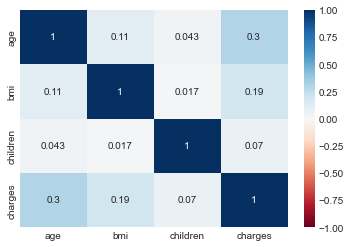

In [167]:
with plt.style.context(seaborn):    
    sns.heatmap(
        insurance_data.corr(), 
        cmap=corrMatrix, 
        vmin=-1, 
        vmax=1, 
        annot=True) 
        
    plt.show();

Expand correlation matrix with dummy

#### Dummy

In [168]:
dummy_df = pd.get_dummies(data=insurance_data, columns=['sex', 'smoker', 'region', 'children', 'bmi_status'])
dummy_df = get_bmi_more_less(dummy_df)

dummy_df.corr().style.background_gradient(cmap=corrMatrix)

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,bmi_status_healthy weight,bmi_status_obesity,bmi_status_overweight,bmi_status_underweight,bmi_m25,bmi_l25
age,1.000000,0.114686,0.302022,0.019143,-0.019143,0.024505,-0.024505,0.001766,-0.000283,-0.011581,0.010474,-0.048540,0.011749,0.007472,0.061588,-0.002011,-0.029979,-0.079425,0.087125,-0.012831,-0.060331,0.091654,-0.095755
bmi,0.114686,1.000000,0.193196,-0.039958,0.039958,0.002871,-0.002871,-0.136193,-0.128598,0.255863,0.000651,-0.012986,-0.014355,0.023607,0.009091,0.019978,-0.018461,-0.604288,0.808468,-0.317289,-0.270937,0.671002,-0.669482
charges,0.302022,0.193196,1.000000,-0.063394,0.063394,-0.785912,0.785912,0.009750,-0.037704,0.071597,-0.045906,-0.066222,-0.024627,0.068330,0.065401,0.007370,-0.043247,-0.105514,0.198241,-0.118690,-0.044939,0.116653,-0.116154
sex_female,0.019143,-0.039958,-0.063394,1.000000,-1.000000,0.079854,-0.079854,-0.000573,0.009961,-0.010263,0.001195,0.014784,-0.002378,-0.003984,-0.003964,-0.015470,-0.012050,0.021795,-0.042546,0.025186,0.025745,-0.032971,0.029162
sex_male,-0.019143,0.039958,0.063394,-1.000000,1.000000,-0.079854,0.079854,0.000573,-0.009961,0.010263,-0.001195,-0.014784,0.002378,0.003984,0.003964,0.015470,0.012050,-0.021795,0.042546,-0.025186,-0.025745,0.032971,-0.029162
smoker_no,0.024505,0.002871,-0.785912,0.079854,-0.079854,1.000000,-1.000000,-0.004947,0.035940,-0.068270,0.039440,0.009183,0.022941,-0.026637,-0.040420,0.028837,0.043146,-0.020515,0.003452,0.019377,-0.014139,0.022246,-0.024280
smoker_yes,-0.024505,-0.002871,0.785912,-0.079854,0.079854,-1.000000,1.000000,0.004947,-0.035940,0.068270,-0.039440,-0.009183,-0.022941,0.026637,0.040420,-0.028837,-0.043146,0.020515,-0.003452,-0.019377,0.014139,-0.022246,0.024280
region_northeast,0.001766,-0.136193,0.009750,-0.000573,0.000573,-0.004947,0.004947,1.000000,-0.322387,-0.343402,-0.321730,0.029145,-0.003171,-0.035887,0.004580,0.011931,-0.020864,0.085680,-0.095385,0.016178,0.074052,-0.103588,0.106113
region_northwest,-0.000283,-0.128598,-0.037704,0.009961,-0.009961,0.035940,-0.035940,-0.322387,1.000000,-0.344807,-0.323046,-0.027001,-0.017419,0.035606,0.041256,-0.001464,-0.051521,0.037239,-0.077826,0.048611,0.030327,-0.043193,0.045537
region_southeast,-0.011581,0.255863,0.071597,-0.010263,0.010263,-0.068270,0.068270,-0.343402,-0.344807,1.000000,-0.344105,0.002113,0.020013,0.009155,-0.037731,-0.021437,0.017107,-0.088000,0.166681,-0.088582,-0.074911,0.110630,-0.108626


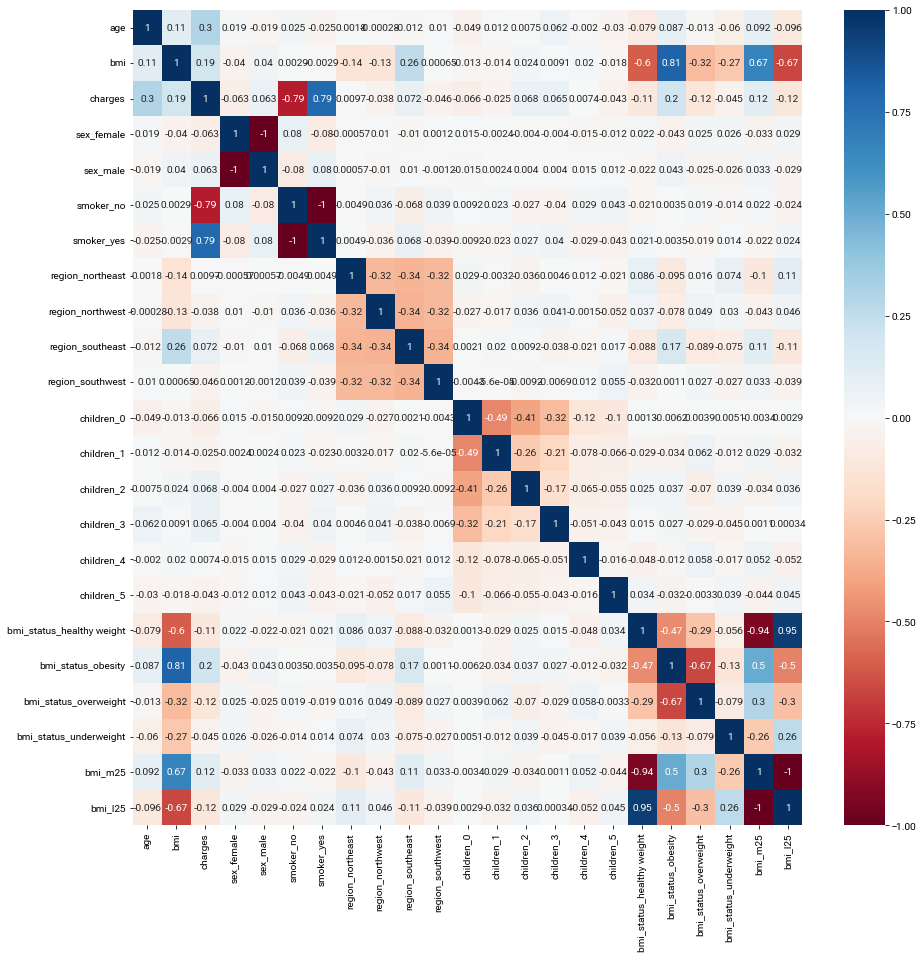

In [169]:
# plot correlation
plt.subplots(figsize=(15, 15))
sns.heatmap(
    dummy_df.corr(), 
    cmap=corrMatrix, 
    vmin=-1, 
    vmax=1, 
    annot=True) 
    
plt.show();

In [170]:
get_corr_cols(dummy_df, 0.7)

{'smoker_no', 'smoker_yes'}

Given all conditions that we have, there's only 2 variables that exceeded the threshold as high correlated with charges (positive or negative), which are smoker status.

#### Smoker Correlation

In [171]:
smoker_dummy = pd.get_dummies(data=smoker, columns=['sex', 'region', 'children', 'bmi_status'])
smoker_dummy = get_bmi_more_less(smoker_dummy)

get_corr_cols(smoker_dummy, 0.7)

{'bmi', 'bmi_status_obesity'}

In [172]:
smoker_dummy

,age,bmi,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,...,children_2,children_3,children_4,children_5,bmi_status_healthy weight,bmi_status_obesity,bmi_status_overweight,bmi_status_underweight,bmi_m25,bmi_l25
0,19,27.900,yes,16884.92400,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
11,62,26.290,yes,27808.72510,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
14,27,42.130,yes,39611.75770,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
19,30,35.300,yes,36837.46700,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
23,34,31.920,yes,37701.87680,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,19,34.700,yes,36397.57600,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
1314,30,23.655,yes,18765.87545,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1321,62,26.695,yes,28101.33305,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1323,42,40.370,yes,43896.37630,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


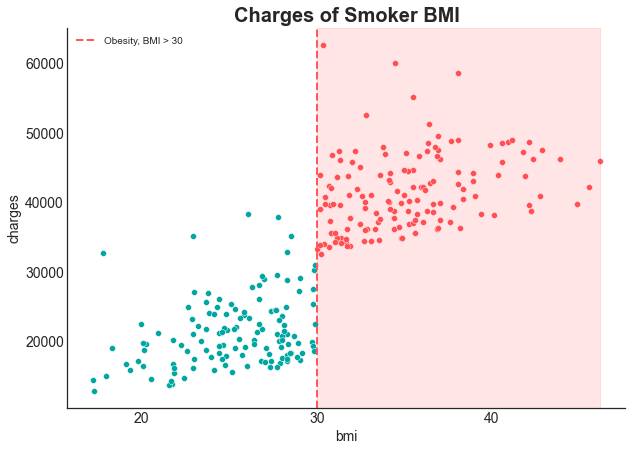

In [173]:
with plt.style.context(seaborn):
    f1 = smoker_dummy.loc[smoker_dummy['bmi'] < 30]
    f2 = smoker_dummy.loc[smoker_dummy['bmi'] > 30]

    fig, ax = plt.subplots(figsize=(10, 7))
    sns.scatterplot(ax=ax, data=f1, x='bmi', y='charges', color='#00a6a1')
    sns.scatterplot(ax=ax, data=f2, x='bmi', y='charges', color='#ff595e')

    ax.set_title('Charges of Smoker BMI')
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

    tick_spacing = 10
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

    ax.axvline(30, linestyle='--', linewidth=2, color='#ff595e', label='Obesity, BMI > 30')
    ax.axvspan(30, smoker_dummy.bmi.max(), alpha=0.1, color='red')

    ax.legend()

    plt.show();

For smokers, bmi > 30 (obesity) has a high correlation with charges (88%)

#### Non-Smoker Correlation

In [174]:
no_smoker_dummy = pd.get_dummies(data=no_smoker, columns=['sex', 'region', 'children', 'bmi_status'])
no_smoker_dummy = get_bmi_more_less(no_smoker_dummy)

get_corr_cols(no_smoker_dummy, 0.7)

set()

Non-Smokers have no variables with high correlation

### Hypothesis Testing

#### Hypothesis 1: Charges of smokers are higher compared to those who not

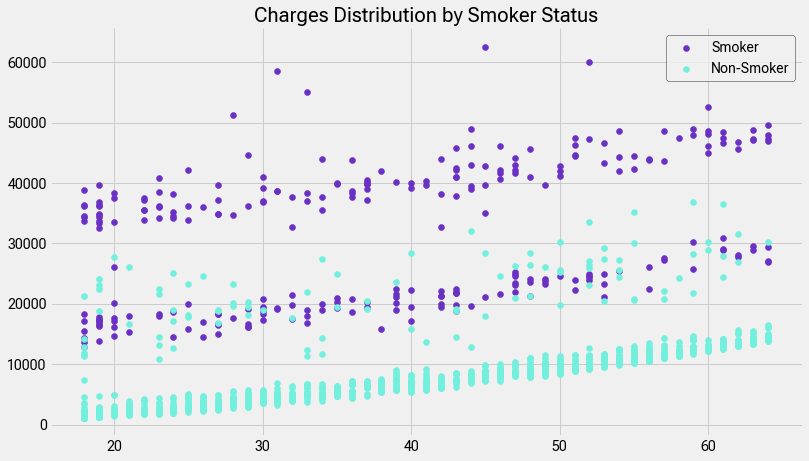

In [175]:
with plt.style.context(mpl): 
    fig, ax = plt.subplots(figsize=(12, 7))
    
    ax.scatter(
        smoker['age'], 
        smoker['charges'], 
        label='Smoker', 
        c=smoker_cat)
    ax.scatter(
        no_smoker['age'], 
        no_smoker['charges'], 
        label='Non-Smoker', 
        c=nosmoker_cat)
    
    ax.legend(edgecolor='black', fontsize=14)
    ax.set_title("Charges Distribution by Smoker Status")

    plt.show();

In [176]:
# T-test
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(insurance_data[insurance_data.smoker == 'yes'].charges) 
y = np.array(insurance_data[insurance_data.smoker == 'no'].charges)

# independent t-test
t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.\np-value: %.8f' % p_value)

Reject Null Hypothesis: claims by smokers charges are the same as non-smoker.
p-value: 0.00000000


Conclusion: Smokers pay higher charges compared to non-smokers

#### Hypothesis 2: Charges of those with BMI > 25 are higher than those with BMI < 25

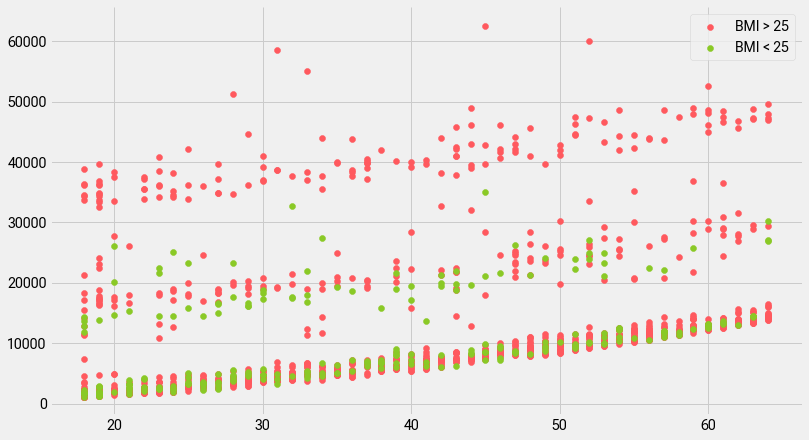

In [177]:
with plt.style.context(mpl):
    fig, ax = plt.subplots(figsize=(12, 7))
    hypo2_bmi_m25 = (insurance_data[bmi_m25])
    hypo2_bmi_l25 = (insurance_data[bmi_l25])

    ax.scatter(
        hypo2_bmi_m25['age'], 
        hypo2_bmi_m25['charges'], 
        label='BMI > 25', 
        c=bmiM25_cat)
    ax.scatter(
        hypo2_bmi_l25['age'], 
        hypo2_bmi_l25['charges'], 
        label='BMI < 25', 
        c=bmiL25_cat)
        
    ax.legend()

    plt.show();

In [178]:
Ho_2 = "Charges of those with BMI > 25 and BMI < 25 are the same"   
Ha_2 = "Charges of those with BMI > 25 and BMI < 25 are not the same"

x = np.array(dummy_df[dummy_df.bmi_m25 == 1].charges) 
y = np.array(dummy_df[dummy_df.bmi_l25 == 1].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims by those with BMI > 25 charges are the same as those with BMI < 25.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims by those with BMI > 25 charges are the same as those with BMI < 25.\np-value: %.8f' % p_value)

Reject Null Hypothesis: claims by those with BMI > 25 charges are the same as those with BMI < 25.
p-value: 0.00002151


Conclusion: Those with BMI > 25 pay higher than those with BMI < 25

#### Hypothesis 3: Male and Female BMI's does not differ significantly

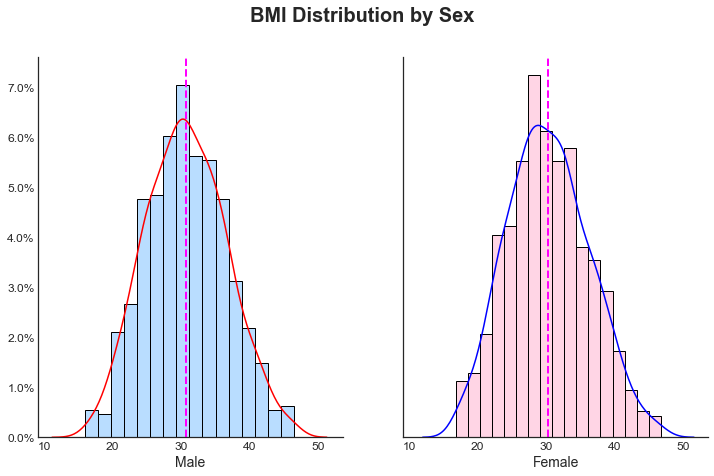

In [179]:
with plt.style.context(seaborn):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7), sharex=True, sharey=True)
    sns.histplot(
        ax=ax1, 
        data=male1, 
        x='bmi',
        color=male_cat,
        stat='density',
        label='Male')
    sns.kdeplot(
        ax=ax1,
        data=male1,
        x='bmi',
        color='red')
    sns.histplot(
        ax=ax2, 
        data=female1, 
        x='bmi',
        color=female_cat,
        stat='density',
        label='Female')
    sns.kdeplot(
        ax=ax2,
        data=female1,
        x='bmi',
        color='blue')

    ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    ax1.set_xlabel('Male')
    ax2.set_xlabel('Female')

    ax1.axvline(male1['bmi'].mean(), linestyle='--', linewidth=2, c='magenta')
    ax2.axvline(female1['bmi'].mean(), linestyle='--', linewidth=2, c='magenta')

    ax1.yaxis.set_tick_params(labelsize=12)
    ax1.xaxis.set_tick_params(labelsize=12)
    ax2.xaxis.set_tick_params(labelsize=12)
    ax1.set(ylabel=None)

    plt.suptitle('BMI Distribution by Sex')
    
    plt.show();

In [180]:
Ho_3 = "BMI of Male and Female does not differ significantly"   
Ha_3 = "BMI of Male and Female does differ significantly"

x = np.array(insurance_data[insurance_data.sex == 'male'].bmi) 
y = np.array(insurance_data[insurance_data.sex == 'female'].bmi)

t, p_value  = stats.ttest_ind(x,y, axis = 0)

if p_value < 0.05:
    print('Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.\np-value: %.8f' % p_value)
else:
    print('Fail to Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.\np-value: %.8f' % p_value)

Fail to Reject Null Hypothesis: claims BMI of Male and Female does not differ significantly.
p-value: 0.14542176


Conclusion: BMI does not differ significantly between male and female

In [181]:
# USE OOP FOR CREATING CHARTS????